## Análisis morfológico y estadistico sobre un texto

### Extraer palabras del texto

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive') # Le estamos diciendo a Colab que se monte en mi Drive

mi_directorio = '/content/drive/My Drive' # Es el directorio de mi unidad
os.chdir(mi_directorio) # Estamos cambiando el directorio existente en el sistema, del directorio de trabajo en la nube a mi directorio de drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re #  Este módulo permite trabajar con patrones de texto para búsqueda, coincidencia y manipulación de cadenas.

list_of_words = [] # Creamos una lista vacía

with open('/content/drive/MyDrive/Universidad /4) MÁSTER EN DATA SCIENCE, BIG DATA & BUSINESS ANALYTICS (UCM)/MÓDULO 2: PROGRAMACIÓN EN PYTHON AVANZADA/Extra/quijote.txt') as file: # Abrimos el archivo
  for line in file.readlines():
    line = re.sub(r'[^\w\s]|[\d]', '', line.lower())  # Elimina signos de puntuación y convierte a minúsculas
    list_of_words += line.split()
  words_set = set(list_of_words)


### Generación de DataFrames

In [ ]:
from collections import Counter #  Sirve para contar elementos en una lista, cadena u otro iterable

import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.DataFrame([{'word': k, 'lenght': len(k), 'count': v} for k, v in Counter(list_of_words).items()])


In [ ]:
# Importamos el archivov morfologia.json, se trata de un diccionario con clasficación del tipo de palabra y el genero
with open ('/content/drive/MyDrive/Universidad /4) MÁSTER EN DATA SCIENCE, BIG DATA & BUSINESS ANALYTICS (UCM)/MÓDULO 2: PROGRAMACIÓN EN PYTHON AVANZADA/Extra/morfologia.json') as json_file: # abrimos el archivo y le adjudicamos el nombre json_file
  morfologia_json = json.load(json_file)

  dict_df = pd.DataFrame(morfologia_json) # Convertimos el dicionario en dataframe

In [ ]:
# Vamos a combinar ambos DataFrames
df = pd.merge(df,dict_df,left_on='word', right_on='palabra', how='left')
df

,word,lenght,count,palabra,tipo,genero,clase,subclase,desuso
0,el,2,8210,el,artículo,masculino,definido,NaN,NaN
1,ingenioso,9,23,ingenioso,adjetivo,masculino,NaN,NaN,NaN
2,hidalgo,7,71,hidalgo,sustantivo,masculino,NaN,NaN,NaN
3,don,3,2647,don,sustantivo,masculino,NaN,NaN,NaN
4,quijote,7,2175,quijote,sustantivo,masculino,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22938,resfriado,9,1,resfriado,adjetivo,masculino,NaN,NaN,NaN
22939,advertirás,10,1,advertirás,verbo,neutro,NaN,NaN,NaN
22940,fuesa,5,1,fuesa,verbo,neutro,NaN,NaN,NaN
22941,aconsejando,11,1,aconsejando,verbo,neutro,NaN,NaN,NaN


In [ ]:
# Vamos a eliminar las variables que no nos interesa
df.drop(['palabra','clase','subclase','desuso'],axis=1,inplace=True)

In [ ]:
df.head()

,word,lenght,count,tipo,genero
0,el,2,8210,artículo,masculino
1,ingenioso,9,23,adjetivo,masculino
2,hidalgo,7,71,sustantivo,masculino
3,don,3,2647,sustantivo,masculino
4,quijote,7,2175,sustantivo,masculino


### Generación de gráficos

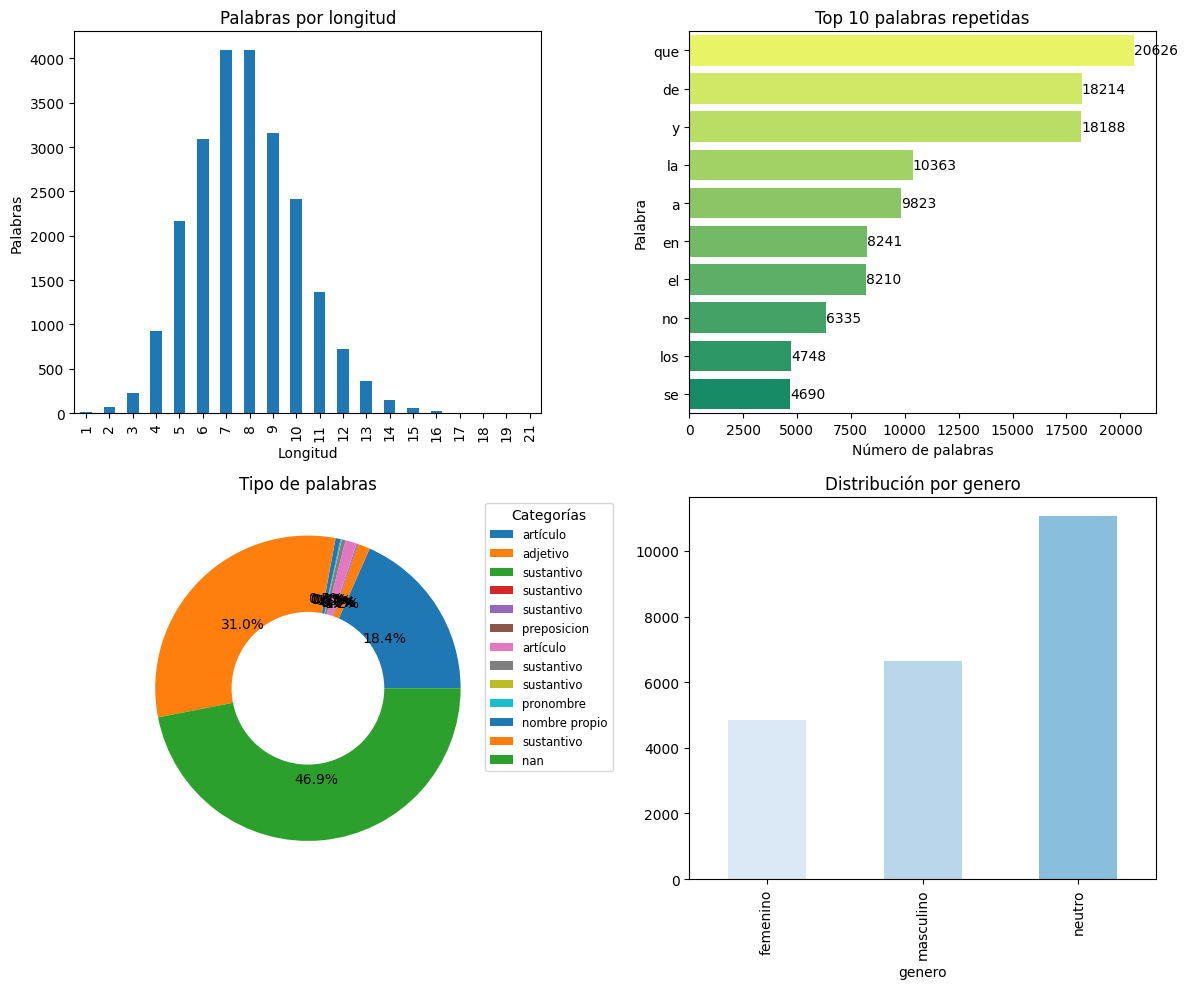

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(12,10))

# Gráfico 1
df.groupby('lenght').size().plot(kind='bar',xlabel='Longitud',ylabel='Palabras',ax=axs[0,0])
axs[0,0].set_title('Palabras por longitud')

# Gráfico 2
top_15 = df.nlargest(10,'count')
top_15.sort_values(by='count',ascending=True,inplace=True)
top_15.set_index('word',inplace=True)
palette = sns.color_palette('summer', len(top_15))
bars = axs[0,1].barh(top_15.index, top_15['count'], color=palette)
axs[0,1].bar_label(bars)
top_15['count'].plot(kind='barh',ax=axs[0,1],color=palette,xlabel='Número de palabras',ylabel='Palabra',title='Top 10 palabras repetidas')

# Gráfico 3
df.groupby('tipo').size().plot(kind='pie', labels=None,ax = axs[1,0],title="Tipo de palabras",autopct='%1.1f%%')
axs[1,0].legend(title="Categorías", labels= df['tipo'],fontsize='small',bbox_to_anchor=(0.95, 1))
centro_circulo = plt.Circle((0,0), 0.50, fc='white')
axs[1,0].add_artist(centro_circulo)

# Gráfico 4
palette = sns.color_palette('Blues')
df.groupby('genero').size().plot(kind='bar',ax = axs[1,1],title='Distribución por genero',color=palette)

fig.tight_layout()

<Axes: title={'center': 'Primera letra de la palabra'}, xlabel='Primera letra', ylabel='Palabras'>

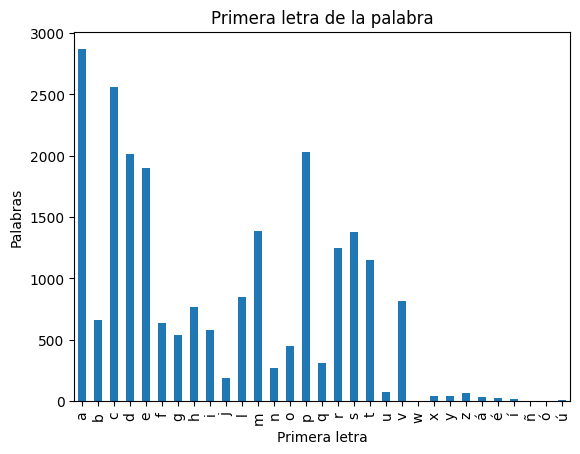

In [86]:
df['primera letra'] = df['word'].str[0] # creamos una nueva columna en el dataFrame com la primera letra de cada palabra
letter_counts = df.groupby('primera letra').size() # Creamos una nueva variable que contabiliza la columna primera letra

letter_counts.plot(kind='bar',ylabel='Palabras',xlabel='Primera letra',title='Primera letra de la palabra')
